In [ ]:
!pip install qiskit qiskit-aer pylatexenc qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 113.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=4b737622a49ed70faf610a964b6d1f8ffcb1e506b891e9c6e948434d42c28aad
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [ ]:
from math import pi,cos,sin
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram , plot_bloch_multivector
import matplotlib.pyplot as plt
from qiskit_aer import Aer

### Problem 1 – Quantum Communication Simulator

What operation you want to perform: 
1.X gate
2.H.gate
3.Z gate
4.no Operation
1


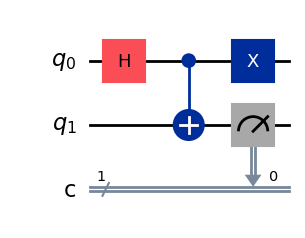

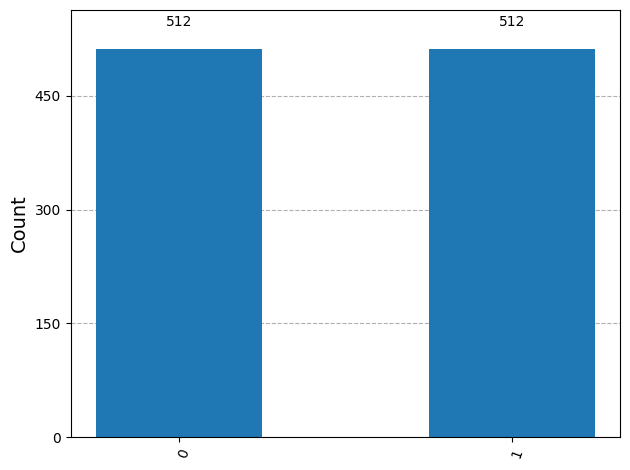

In [ ]:
# 2 people Alice - qubit 0 and Bob - qubit 1
op=int(input("What operation you want to perform: \n1.X gate\n2.H.gate\n3.Z gate\n4.no Operation\n"))
qc1=QuantumCircuit(2,1)
qc1.h(0)
qc1.cx(0,1)
if op==1:
  qc1.x(0)
elif op==2:
  qc1.h(0)
elif op==3:
  qc1.z(0)
else:
  pass
# qc1.measure(0,0)
qc1.measure(1,0)
display(qc1.draw("mpl"))
backend = Aer.get_backend('qasm_simulator')
tqc_bell = transpile(qc1, backend)
result = backend.run(tqc_bell,shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)


###3-Qubit GHZ State Experiment

We will create a 3-qubit GHZ state (generalization of the Bell state):
Here:

- Qubit 0: Alice  
- Qubit 1: Bob  
- Qubit 2: Charlie  





What operation you want to perform on Alice?
1. X gate
2. H gate
3. Z gate
4. No operation
2


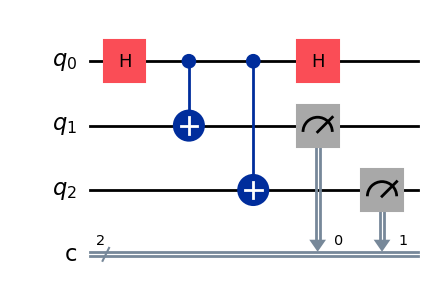

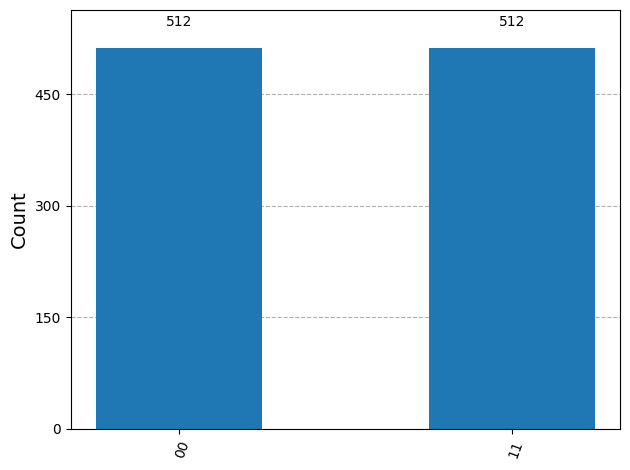

In [40]:
# 3 qubits
op = int(input("What operation you want to perform on Alice?\n1. X gate\n2. H gate\n3. Z gate\n4. No operation\n"))
# 3 qubits: Alice (0), Bob (1), Charlie (2)
qc = QuantumCircuit(3, 2)
# Hadamard on Alice
# CNOT Alice -> Bob
# CNOT Alice -> Charlie
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
if op == 1:
    qc.x(0)
elif op == 2:
    qc.h(0)
elif op == 3:
    qc.z(0)
else:
    pass
qc.measure([1, 2], [0, 1])

display(qc.draw('mpl'))

backend = Aer.get_backend('qasm_simulator')
tqc = transpile(qc, backend)
result = backend.run(tqc, shots=1024).result()
counts = result.get_counts()
display(plot_histogram(counts))

### Problem 2 – Quantum Coin Game (Superposition)

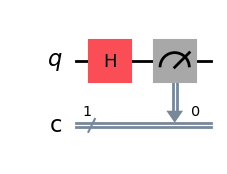

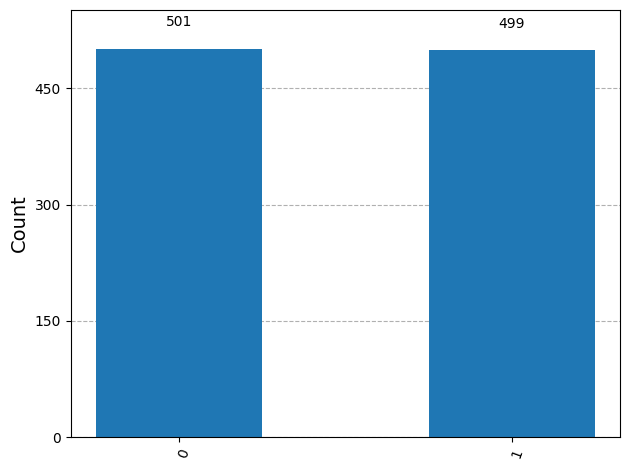

In [20]:
# question 2
# creating a qubit that represents coin
# cosidering Heads |0> and tails |1>
fair_coin=QuantumCircuit(1,1)
fair_coin.h(0)  #superposition 50% chance of Heads, 50% chance of Tails when measured
fair_coin.measure(0,0)
display(fair_coin.draw("mpl"))
tqc_bell = transpile(fair_coin, backend)
result = backend.run(tqc_bell,shots=1000).result()
counts = result.get_counts()
plot_histogram(counts)

The RY gate rotates a qubit state around the Y-axis of the Bloch sphere by a given angle θ.

It changes the probability of measuring 0 or 1, making it useful for simulating biased quantum coin tosses

Angle 0 calculations:
Theoretical - Heads: 100.0%, Tails: 0.0%


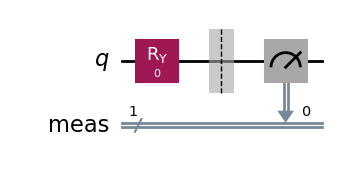

Experimental - Heads: 100.0%, Tails: 0.0%
Angle π/4 calculations:
Theoretical - Heads: 85.4%, Tails: 14.6%


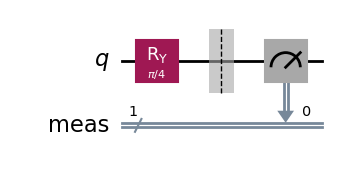

Experimental - Heads: 86.4%, Tails: 13.6%
Angle π/3 calculations:
Theoretical - Heads: 75.0%, Tails: 25.0%


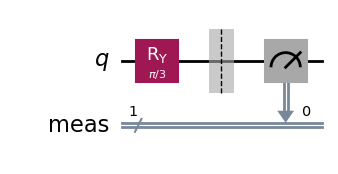

Experimental - Heads: 74.4%, Tails: 25.6%
Angle 2π/3 calculations:
Theoretical - Heads: 25.0%, Tails: 75.0%


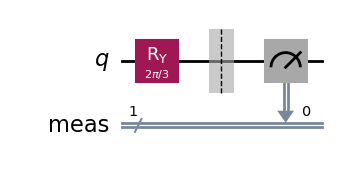

Experimental - Heads: 21.6%, Tails: 78.4%
Angle π/6 calculations:
Theoretical - Heads: 93.3%, Tails: 6.7%


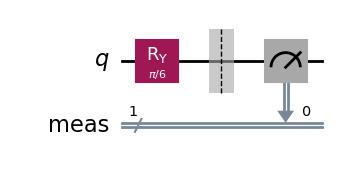

Experimental - Heads: 94.2%, Tails: 5.8%
Angle 3π/4 calculations:
Theoretical - Heads: 14.6%, Tails: 85.4%


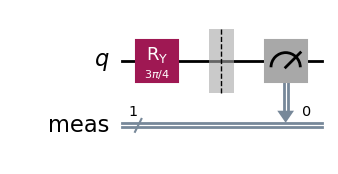

Experimental - Heads: 15.0%, Tails: 85.0%


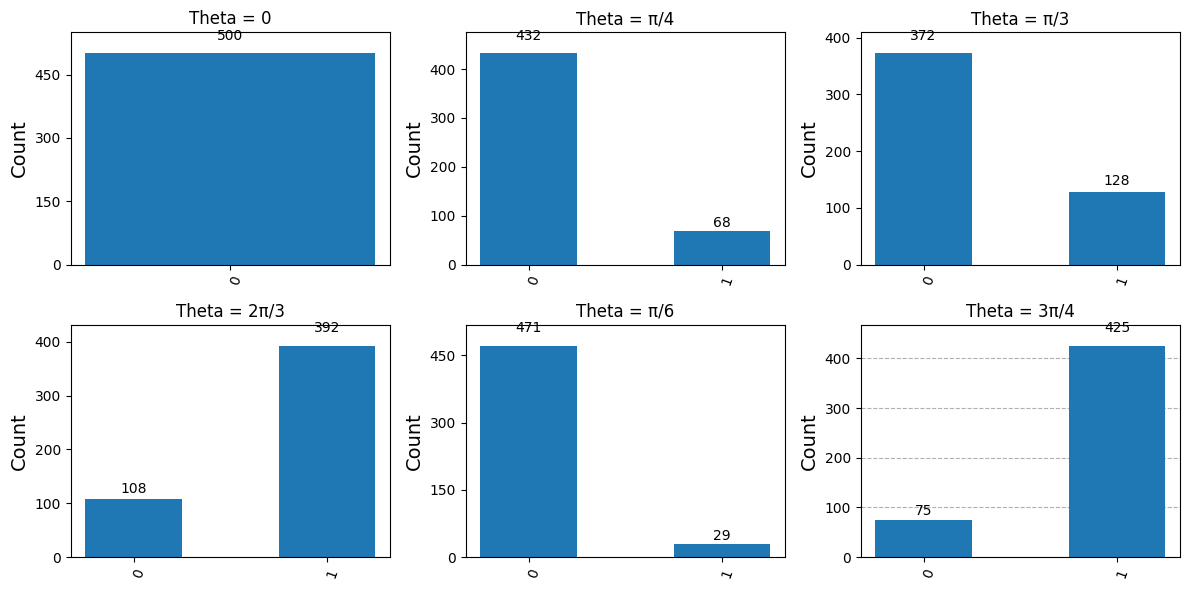

In [ ]:
# now replacing the Hadamard gate with rotation around y axis gate (RY(θ)).
# probabilities become unbalanced and depend upon theta(θ).
# list of angles
# cosidering Heads |0> and tails |1>
i=0
ang=[0,pi/4,pi/3,2*pi/3,pi/6,3*pi/4]
ang_names = ['0', 'π/4', 'π/3', '2π/3', 'π/6', '3π/4']
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
# Loop through each angle and corresponding subplot
for theta,ax in zip(ang,axes.flat):
  biased_coin=QuantumCircuit(1)
  biased_coin.ry(theta,0)
  biased_coin.measure_all()
  print(f"Angle {ang_names[i]} calculations:")
  p_heads = cos(theta/2)**2
  p_tails = sin(theta/2)**2
  print(f"Theoretical - Heads: {p_heads:.1%}, Tails: {p_tails:.1%}")
  display(biased_coin.draw("mpl"))
  tqc_bell = transpile(biased_coin, backend)
  result = backend.run(tqc_bell,shots=500).result()
  counts = result.get_counts() #In Qiskit, when you run a circuit with many shots (repetitions), the result is stored in a dictionary
  total_shots = sum(counts.values())
  exp_heads = counts.get('0', 0) / total_shots
  exp_tails = counts.get('1', 0) / total_shots
  print(f"Experimental - Heads: {exp_heads:.1%}, Tails: {exp_tails:.1%}")
  plot_histogram(counts,ax=ax)
  ax.set_title(f"Theta = {ang_names[i]}")
  i+=1
plt.tight_layout()
plt.show()

##2 players

Enter your angle to toss the coin:
1.0
2.π/6,
3.π/2,
4.2π/3,
5.3π/4
Player 1,Enter Option: 2
Palyer 2,Enter Option: 1


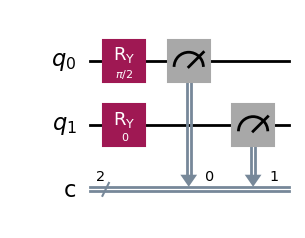


=== Game Results ===
Alice heads probability: 49.6%
Bob heads probability: 100.0%
Bob Wins!

Detailed outcomes:
  00: 248 times (49.6%)
  01: 252 times (50.4%)


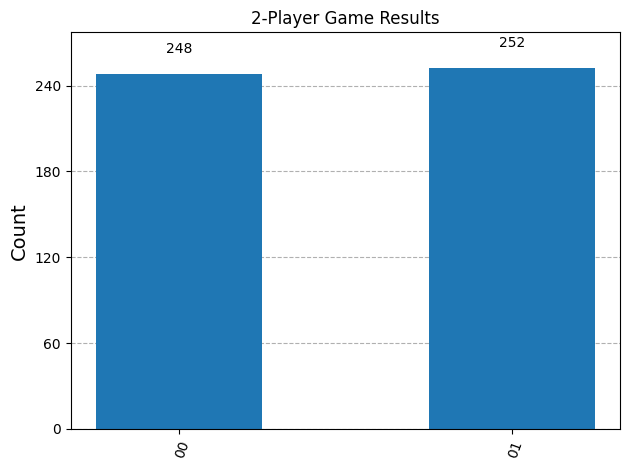

In [21]:
# 2 player game
qc3=QuantumCircuit(2,2)
print(f"Enter your angle to toss the coin:\n1.0\n2.π/6,\n3.π/2,\n4.2π/3,\n5.3π/4")
ang=[0,pi/2,pi/6,2*pi/3,3*pi/4]
player1=int(input("Player 1,Enter Option: "))-1
player2=int(input("Palyer 2,Enter Option: "))-1
qc3.ry(ang[player1],0)
qc3.ry(ang[player2],1)
qc3.measure(0,0)
qc3.measure(1,1)
display(qc3.draw("mpl"))
tqc_bell = transpile(qc3, backend)
result = backend.run(tqc_bell,shots=500).result()
counts = result.get_counts()
total_shots = sum(counts.values())
# In Qiskit, the keys of the counts dictionary store the measured qubits as bitstrings (e.g., '01'),
#  where the leftmost bit is the highest-index qubit.`
# For example, in '01', qubit 1 measured 0 and qubit 0 measured 1.`
player1_heads = sum(v for k,v in counts.items() if k[1] == '0')
player2_heads   = sum(v for k,v in counts.items() if k[0] == '0')
player1_prob = player1_heads/ total_shots
player2_prob = player2_heads/ total_shots
print(f"\n=== Game Results ===")
print(f"Alice heads probability: {player1_prob:.1%}")
print(f"Bob heads probability: {player2_prob:.1%}")
if player1_prob > player2_prob:
    print("Alice Wins!")
elif player1_prob < player2_prob:
    print("Bob Wins!")
else:
    print("It's a Draw!")
print(f"\nDetailed outcomes:")
for outcome, count in counts.items():
    print(f"  {outcome}: {count} times ({count/total_shots:.1%})")
plot_histogram(counts,title="2-Player Game Results")

###Problem 3 – Quantum Correlation Explorer
####There are 4 Bell states, often written as |Φ⁺>, |Φ⁻>, |Ψ⁺>, and |Ψ⁻>:
#### |Φ⁺> = (|00> + |11>)/√2 → both qubits same (positive correlation)
#### |Φ⁻> = (|00> - |11>)/√2 → both qubits same but with phase difference
#### |Ψ⁺> = (|01> + |10>)/√2 → qubits opposite (positive correlation)
#### |Ψ⁻> = (|01> - |10>)/√2 → qubits opposite with phase difference

In [31]:
def four_bell_state(bell_type='phi_plus'):
  qc = QuantumCircuit(2, 2)
  if bell_type == 'phi_plus':
    qc.h(0)
    qc.cx(0, 1)
  elif bell_type == 'phi_minus':
    qc.h(0)
    qc.cx(0,1)
    qc.z(0)
  elif bell_type== 'psi_plus' :
    qc.h(0)
    qc.cx(0, 1)
    qc.x(1)
  elif bell_type == 'psi_minus':
    qc.h(0)
    qc.cx(0, 1)
    qc.x(1)
    qc.z(0)
  return qc
bell_states = {
    "Φ⁺": "phi_plus",
    "Φ⁻": "phi_minus",
    "Ψ⁺": "psi_plus",
    "Ψ⁻": "psi_minus"
}
# for name, state in bell_states.items():
#   print(f"\n================ Bell State: {name} ================")
#   base_circuit = four_bell_state(state)
#   display(base_circuit.draw('mpl'))
#   tqc = transpile(base_circuit, backend)
#   result = backend.run(tqc, shots=500).result()
#   counts = result.get_counts()
#   print("\nMeasurement results in computational basis:")
#   print(f"Outcomes: {counts}")
#   display(plot_histogram(counts, title="Bell State Measurements"))

In [32]:
# rotation
def apply_rotation(qc, gate_type):
  if gate_type == "H":
      qc.h(0); qc.h(1)
  elif gate_type == "S":
      qc.s(0); qc.s(1)
  elif gate_type == "T":
      qc.t(0); qc.t(1)
  return qc
rotations = ["None", "H", "S", "T"]
def calculate_correlation(counts, shots):
  P_00 = counts.get('00', 0) / shots
  P_11 = counts.get('11', 0) / shots
  P_01 = counts.get('01', 0) / shots
  P_10 = counts.get('10', 0) / shots
  correlation = (P_00 + P_11) - (P_01 + P_10)
  # Probability of same outcome (for analysis)
  P_same = P_00 + P_11
  return correlation, P_same


================ Bell State: Φ⁺ ================

-- Rotation: None --


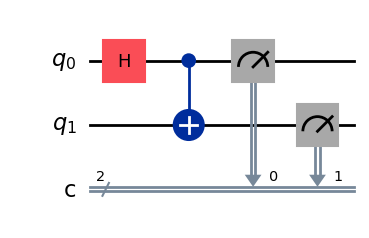


Measurement results in computational basis:
Outcomes: {'11': 244, '00': 256}


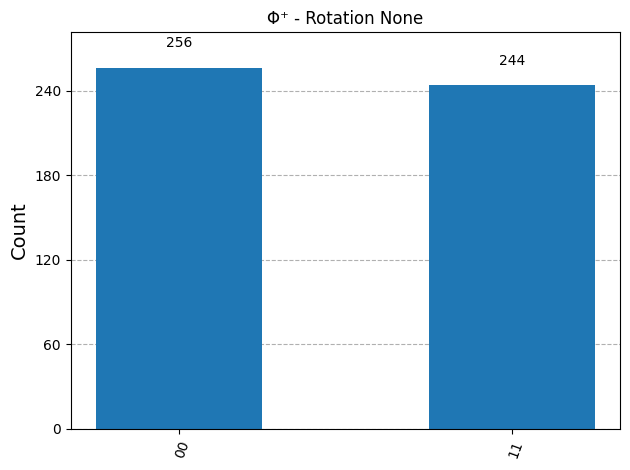

Correlation Coefficient E = 1.000
Probability of same outcome (P_same) = 1.000

-- Rotation: H --


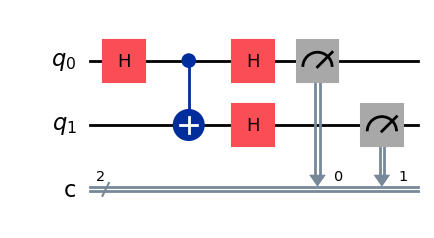


Measurement results in computational basis:
Outcomes: {'00': 264, '11': 236}


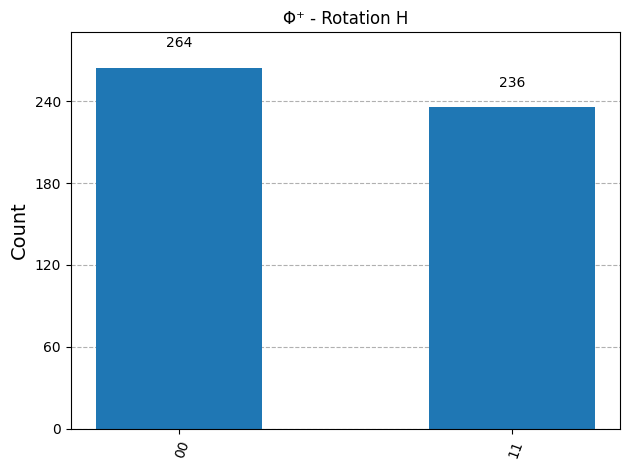

Correlation Coefficient E = 1.000
Probability of same outcome (P_same) = 1.000

-- Rotation: S --


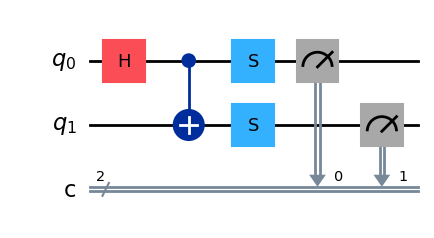


Measurement results in computational basis:
Outcomes: {'00': 251, '11': 249}


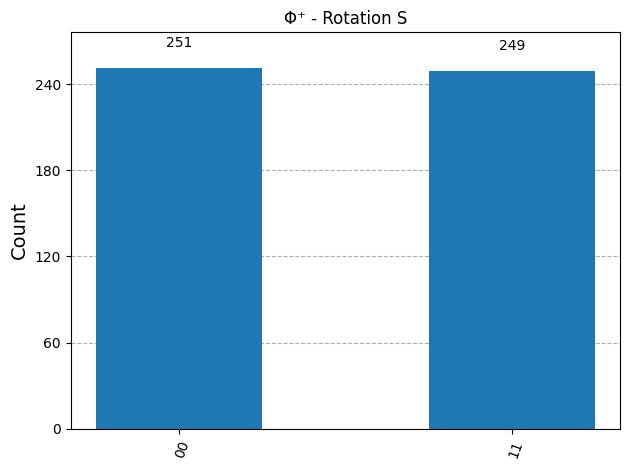

Correlation Coefficient E = 1.000
Probability of same outcome (P_same) = 1.000

-- Rotation: T --


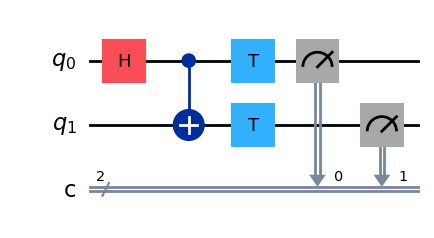


Measurement results in computational basis:
Outcomes: {'00': 251, '11': 249}


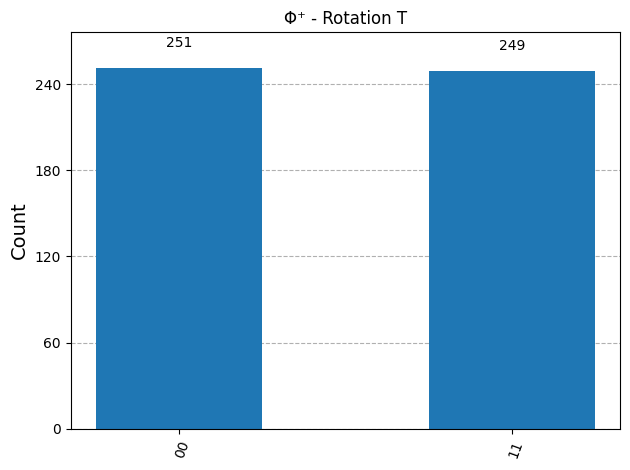

Correlation Coefficient E = 1.000
Probability of same outcome (P_same) = 1.000

================ Bell State: Φ⁻ ================

-- Rotation: None --


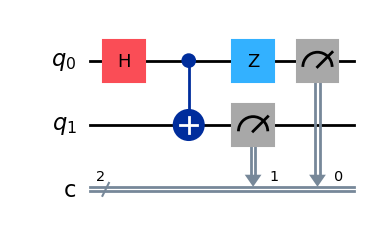


Measurement results in computational basis:
Outcomes: {'00': 244, '11': 256}


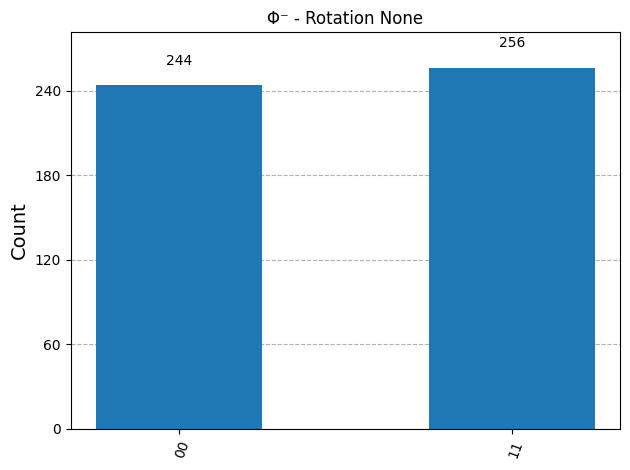

Correlation Coefficient E = 1.000
Probability of same outcome (P_same) = 1.000

-- Rotation: H --


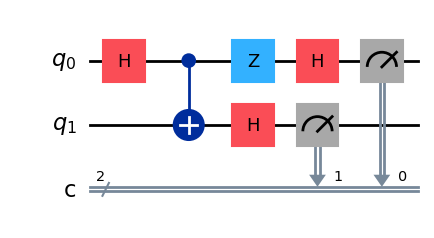


Measurement results in computational basis:
Outcomes: {'01': 243, '10': 257}


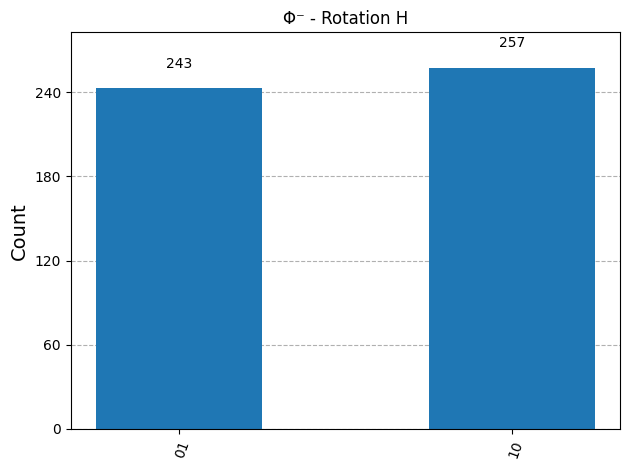

Correlation Coefficient E = -1.000
Probability of same outcome (P_same) = 0.000

-- Rotation: S --


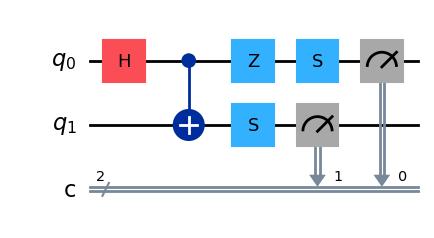


Measurement results in computational basis:
Outcomes: {'00': 231, '11': 269}


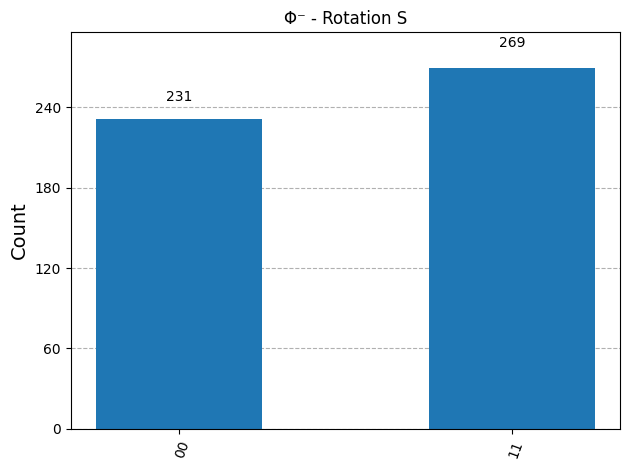

Correlation Coefficient E = 1.000
Probability of same outcome (P_same) = 1.000

-- Rotation: T --


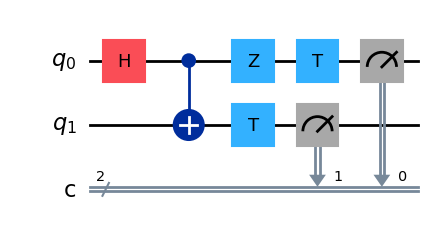


Measurement results in computational basis:
Outcomes: {'11': 251, '00': 249}


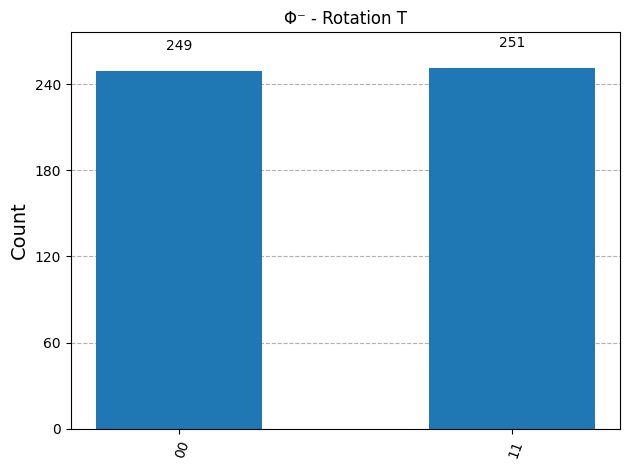

Correlation Coefficient E = 1.000
Probability of same outcome (P_same) = 1.000

================ Bell State: Ψ⁺ ================

-- Rotation: None --


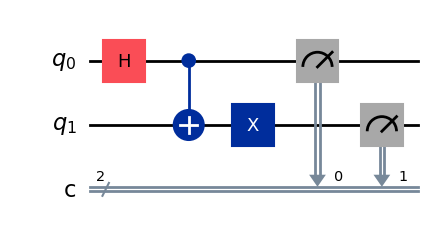


Measurement results in computational basis:
Outcomes: {'10': 253, '01': 247}


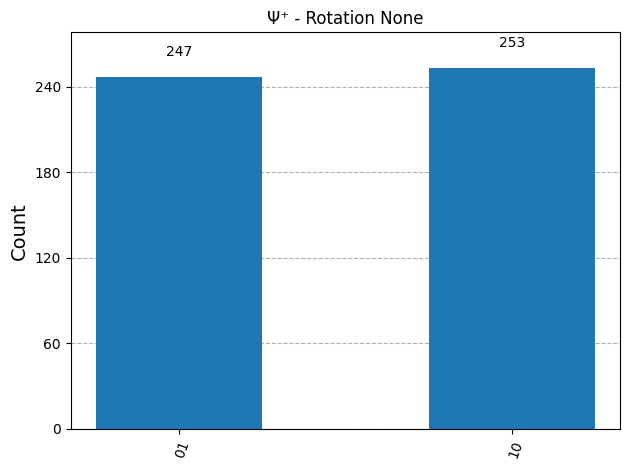

Correlation Coefficient E = -1.000
Probability of same outcome (P_same) = 0.000

-- Rotation: H --


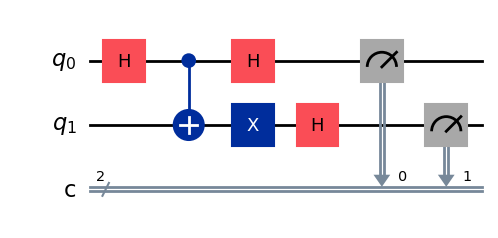


Measurement results in computational basis:
Outcomes: {'11': 268, '00': 232}


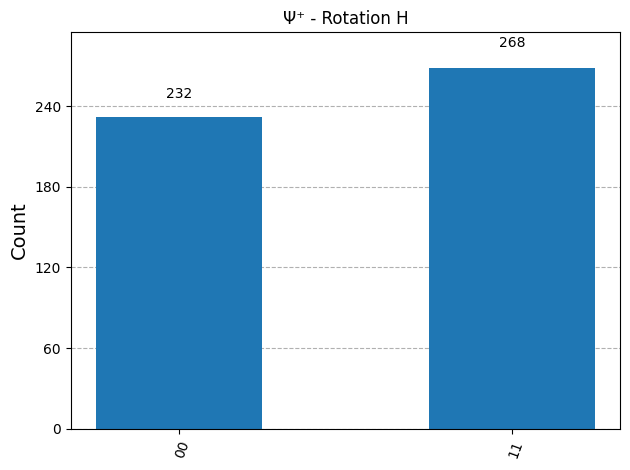

Correlation Coefficient E = 1.000
Probability of same outcome (P_same) = 1.000

-- Rotation: S --


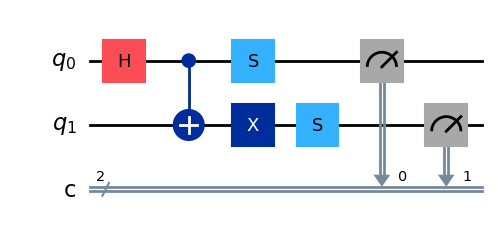


Measurement results in computational basis:
Outcomes: {'10': 253, '01': 247}


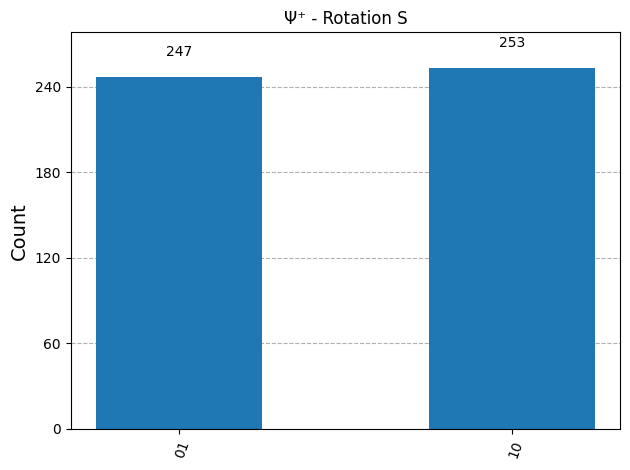

Correlation Coefficient E = -1.000
Probability of same outcome (P_same) = 0.000

-- Rotation: T --


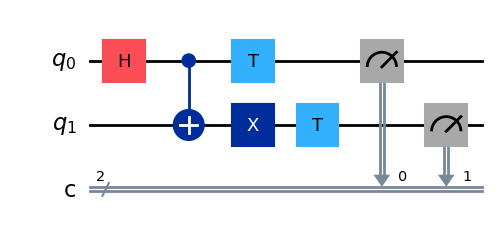


Measurement results in computational basis:
Outcomes: {'01': 234, '10': 266}


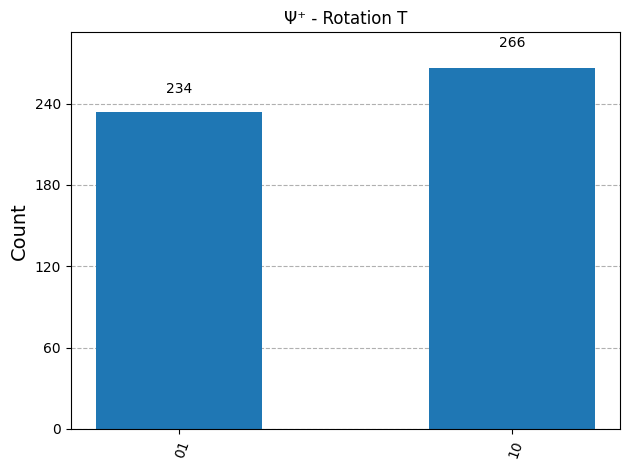

Correlation Coefficient E = -1.000
Probability of same outcome (P_same) = 0.000

================ Bell State: Ψ⁻ ================

-- Rotation: None --


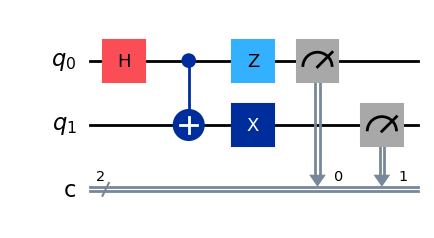


Measurement results in computational basis:
Outcomes: {'01': 240, '10': 260}


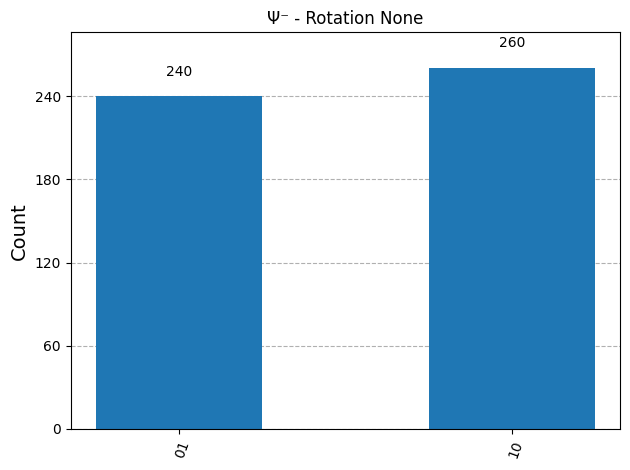

Correlation Coefficient E = -1.000
Probability of same outcome (P_same) = 0.000

-- Rotation: H --


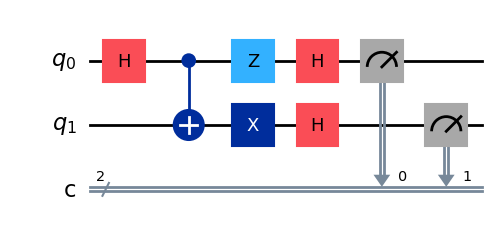


Measurement results in computational basis:
Outcomes: {'10': 245, '01': 255}


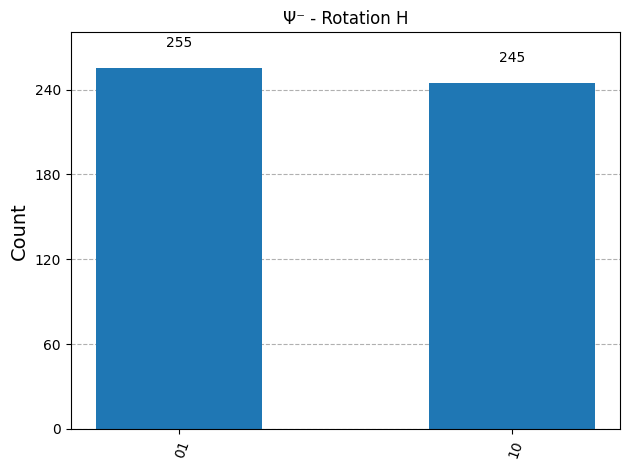

Correlation Coefficient E = -1.000
Probability of same outcome (P_same) = 0.000

-- Rotation: S --


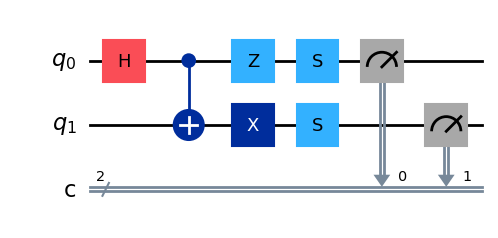


Measurement results in computational basis:
Outcomes: {'10': 235, '01': 265}


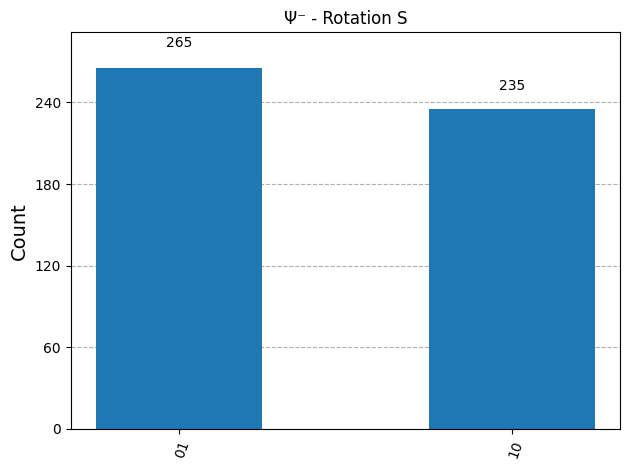

Correlation Coefficient E = -1.000
Probability of same outcome (P_same) = 0.000

-- Rotation: T --


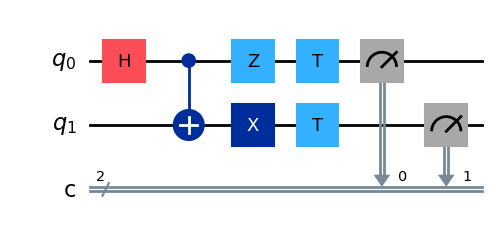


Measurement results in computational basis:
Outcomes: {'10': 256, '01': 244}


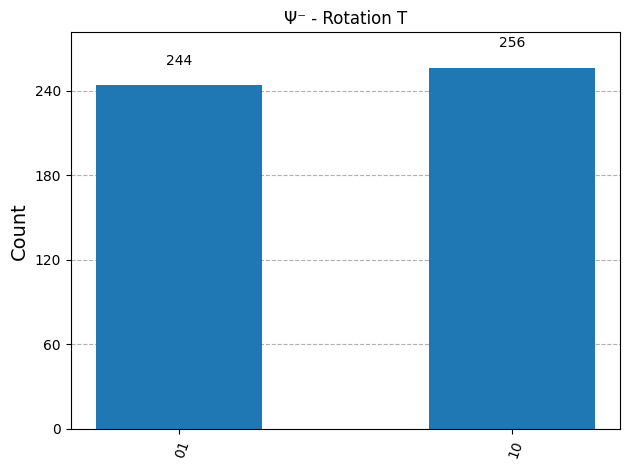

Correlation Coefficient E = -1.000
Probability of same outcome (P_same) = 0.000


In [42]:
shots=500
for name, state in bell_states.items():
  print(f"\n================ Bell State: {name} ================")
  base_circuit = four_bell_state(state)
  for rot in rotations:
    print(f"\n-- Rotation: {rot} --")
    qc = base_circuit.copy()
    if rot != "None":
        qc = apply_rotation(qc, rot)
    qc.measure([0, 1], [0, 1])
    # # sphere
    # statevector = Statevector.from_instruction(qc.remove_final_measurements(inplace=False))
    # display(plot_bloch_multivector(statevector))

    display(qc.draw('mpl'))

    tqc = transpile(qc, backend)
    result = backend.run(tqc, shots=shots).result()
    counts = result.get_counts()
    print("\nMeasurement results in computational basis:")
    print(f"Outcomes: {counts}")
    display(plot_histogram(counts, title=f"{name} - Rotation {rot}"))
    E, P_same = calculate_correlation(counts, shots=shots)
    print(f"Correlation Coefficient E = {E:.3f}")
    print(f"Probability of same outcome (P_same) = {P_same:.3f}")